# Openness and fluid overpressures

We analyse the relationship between the openness and the pressure necessary to reach the failure envelop, or critical pressure $P_c$. <br> $P_c$ is calculated as : $P_c=\sigma_n-\frac{\tau_c-c}{\mu}$, with $c$ and $\mu$, the failure parameters measured from tests on sealed fractures (Glamheden, 2007). 

<div>
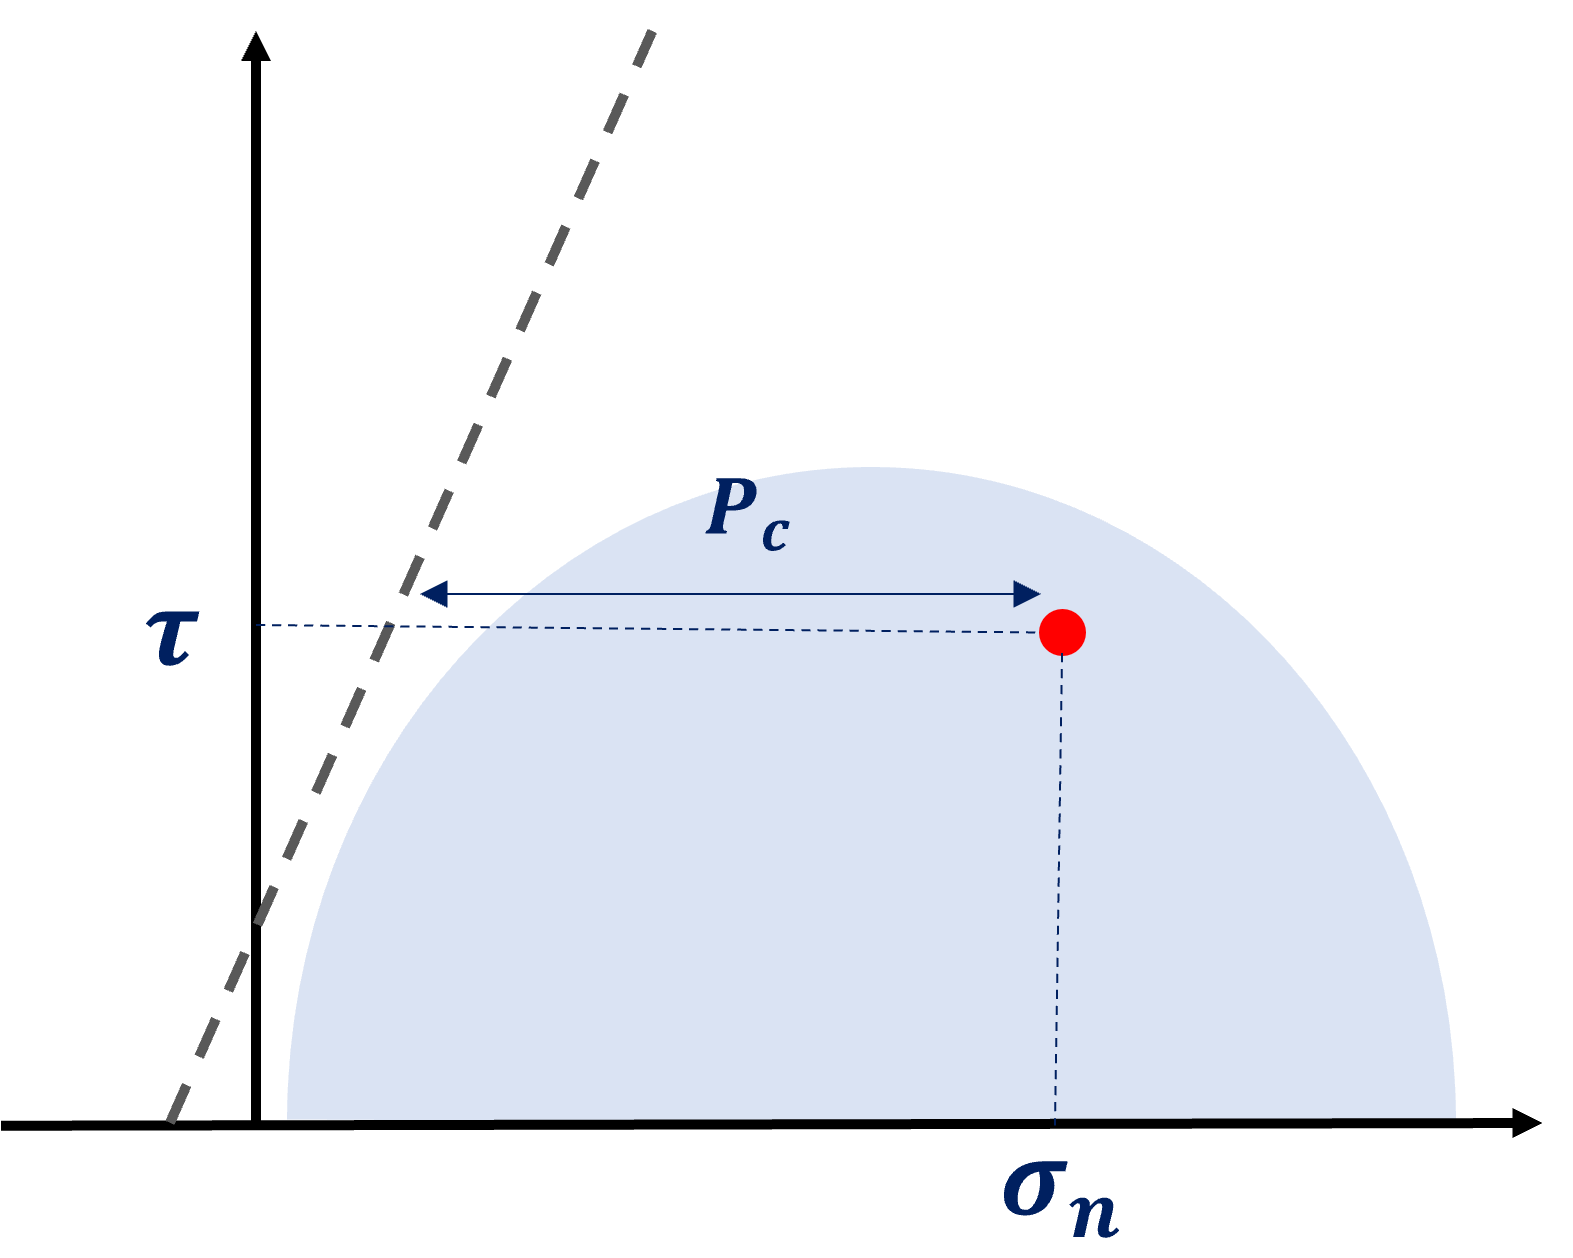
</div>

Our analysis consists in separating the dataset in different groups:
- by orientations
- by depths 
- by deformation zones or fracture domaines

### Python packages and functions

In [29]:
import sys, os, math, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path=r'python_functions'
sys.path.append(path)

import utils_fop as uF #functions to calculate openness

### Retrieve Forsmark fracture dataset, with stresses calculated in previous notebook

In [30]:
input_folder = r'input_data'
filename = 'p_frac_core_select_with_stresses'
all_data = pd.read_csv(os.path.join(input_folder,filename+str('.txt')), sep = '\t')

### Compute critical fluid pressure $P_c$

In [31]:
# Sealed fracture parameters
_mu_s = 1.33
_c_s = 4

# Critical fluid pressure (MPa)
all_data['Pc'] = all_data['norm_stress'] - (all_data['tan_stress']-_c_s)/_mu_s

### Normalized fluid pressure $P_c^*$

$P_c^*=\frac{P_c-P_h}{P_l-P_h}$ <br>
$P_h$ : hydrostatic pressure ($\rho.g.z$) <br>
$P_l$ : lithostatic pressure (average of the three main stress components)

In [32]:
# Hydrological and lithological fluid pressure (MPa)
_gw = 9.81*1000 #(rho*g)
pf_hydro = (_gw*-all_data['ELEVATION_ADJUSTEDSECUP'])*10**-6
pf_litho = (-all_data['V_stress']-all_data['H_stress']-all_data['h_stress'])/3

# Normalized critical fluid pressure
all_data['Pc_norm'] = (all_data['Pc'] - pf_hydro)/(pf_litho - pf_hydro)

Choose the plot

## 1) Openness as a function of $P_c$ and $P_c^*$

In [33]:
bin_number=30 # number of bins
min_number=100 # minimum number of data

Compute openness in bins of $P_c$:

In [34]:
analysis = uF.fop(all_data,'Pc',bin_number=bin_number)

Compute openness in bins of $P_c^*$:

In [35]:
analysis_norm = uF.fop(all_data,'Pc_norm',bin_number=bin_number)

Plot

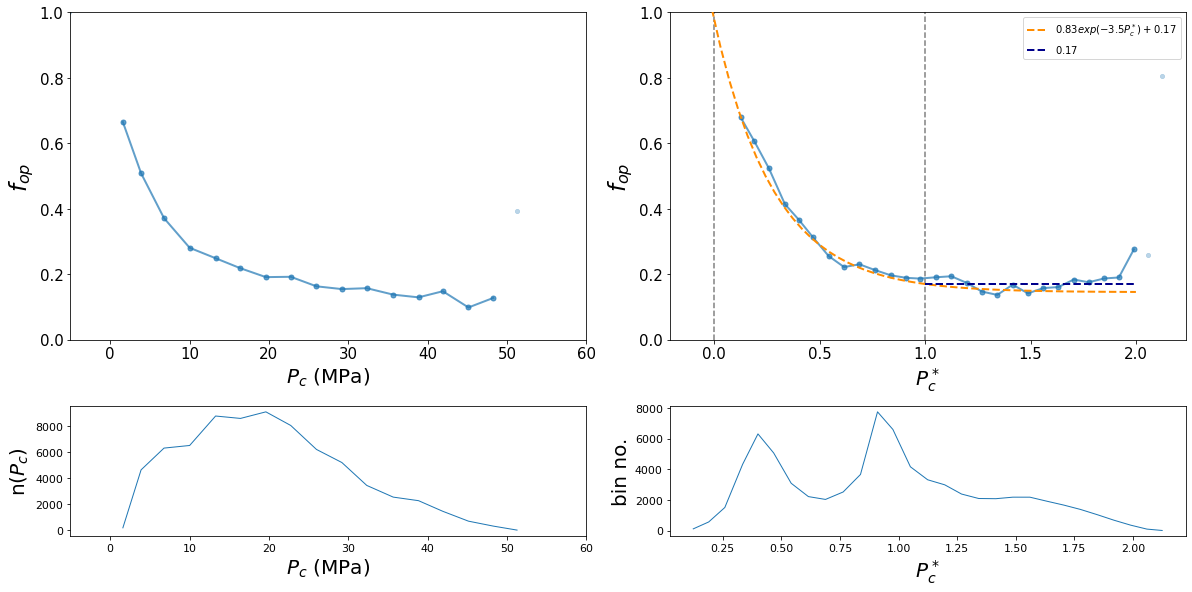

In [36]:
fig = plt.figure()

#------Pc
var = 'Pc'

ax = plt.subplot2grid((3, 2), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 2), (2, 0), rowspan = 1)

#select bins with low number of data (N)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
# plot
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7,  linewidth = 2)
ax.scatter(data_nvalid[var], data_nvalid['fop32'], marker='o', alpha=0.3, s = 20, linewidth = 0.5) 
# plot data number N per bin
ax2.plot(analysis[var], analysis['N'], linestyle = '-', linewidth = 1)

#------Pc norm
var = 'Pc_norm'

ax3 = plt.subplot2grid((3, 2), (0, 1), rowspan = 2) 
ax4 = plt.subplot2grid((3, 2), (2, 1), rowspan = 1)

#select bins with low number of data (N)
data_valid= analysis_norm.loc[analysis_norm['N']>=min_number]
data_nvalid=analysis_norm.loc[analysis_norm['N']< min_number]

# plot
ax3.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, linewidth = 2)
ax3.scatter(data_nvalid[var], data_nvalid['fop32'], marker='o', alpha=0.3, s = 20,  linewidth = 0.5) 
# plot data number N per bin
ax4.plot(analysis_norm[var], analysis_norm['N'], linestyle = '-', linewidth = 1)

# fitting lines 
x = np.linspace(-0.1,2,50)
fop_min=0.17
B=3.5
ax3.plot(x,(1-fop_min)*(np.exp(-B*x)-np.exp(-B))+fop_min, '--', linewidth = 2, color = 'darkorange', label = '${:g}exp(-{:g} P_c^*)+{:g}$'.format(1-fop_min,B,fop_min), zorder = 50)
ax3.plot([1,2],[fop_min,fop_min],'--', linewidth = 2, color = 'darkblue', label = '${:g}$'.format(fop_min), zorder = 60)

# vertical lines (hydrostatic (0) and lithostatic (1) pressures)
ax3.vlines(0, 0, 1, colors='gray', linestyles='--')
ax3.vlines(1, 0, 1, colors='gray', linestyles='--')


#------format graphs
ax.set_xlabel('$P_c$ (MPa)', fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel('$P_c$ (MPa)', fontsize = 20)
ax2.set_ylabel('n($P_c$)', fontsize = 20)
ax.set_ylim(0,1)
ax.set_xlim(-5,60)
ax2.set_xlim(-5,60)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

ax3.set_xlabel('$P_c^*$', fontsize = 20)
ax3.set_ylabel('$f_{op}$', fontsize = 23)
ax4.set_xlabel('$P_c^*$', fontsize = 20)
ax4.set_ylabel('bin no.', fontsize = 20)
ax3.legend(fontsize = 10)
ax3.set_ylim(0,1)
ax3.tick_params(labelsize = 15)
ax4.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(1200./fig.dpi,600./fig.dpi)
plt.show()

#save figure
# file_path = os.path.join('output_figures', var+'_by_orientations')
# fig.savefig(file_path)
fig.clf()

## 2) Analysis with different orientations groups

### Choose the plot

In [37]:
var='Pc_norm'

bin_number=30 # number of bins
min_number=100 # minimum number of data

if var=='Pc_norm':
    xlabel='$P_c^*$'
    bin_min = 0
    bin_max = 3
else:
    xlabel='$P_c$ (MPa)'
    bin_min = 0
    bin_max = max(all_data[var])

### Orientation groups and plot properties 

In [43]:
angle= [(0,90),(0,20),(20,65),(65,90)]
name = ['All','Horizontal (0-20)', 'Intermediate (20-65)', 'Vertical (65-90)']
color = ['black','crimson', 'darkblue', 'green']
lineWidth = [3,1.5,1.5,1.5]
z_order = [10,30,20,40]

### Compute openness in bins of $P_c$ and plot

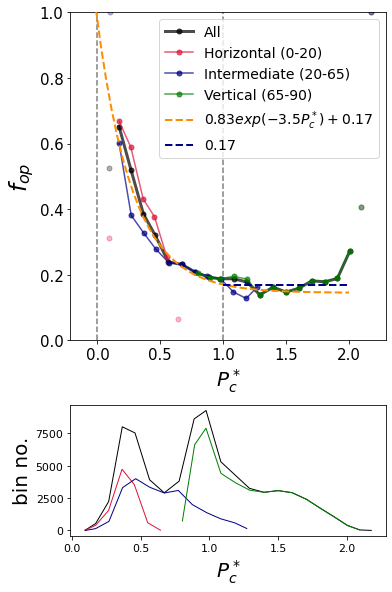

In [44]:
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)


# loop over orientation groups
for i,_angle in enumerate(angle):
    _name=name[i]
   
    # select data by orientation group
    dataframe_a=all_data.loc[(all_data['DIP(degrees)'] <= angle[i][1]) & (all_data['DIP(degrees)'] >=  angle[i][0])].copy()
    
    # compute openness in bins of Pc and Pc*
    analysis = uF.fop(dataframe_a,var,bin_number=bin_number, min=bin_min, max = bin_max)
    
    #select bins with low number of data (N)
    data_valid= analysis.loc[analysis['N']>=min_number]
    data_nvalid=analysis.loc[analysis['N']< min_number]
    
    # plot openness
    ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = color[i], linewidth = lineWidth[i], zorder = z_order[i], label = _name)
    ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = color[i]) 
    # plot data number N per bin
    ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = color[i], linewidth = 1, label = _name)

# fitting lines 
x = np.linspace(-0.1,2,50)
fop_min=0.17
B=3.5
ax.plot(x,(1-fop_min)*(np.exp(-B*x)-np.exp(-B))+fop_min, '--', linewidth = 2, color = 'darkorange', label = '${:g}exp(-{:g} P_c^*)+{:g}$'.format(1-fop_min,B,fop_min), zorder = 50)
ax.plot([1,2],[fop_min,fop_min],'--', linewidth = 2, color = 'darkblue', label = '${:g}$'.format(fop_min), zorder = 60)

# vertical lines (hydrostatic (0) and lithostatic (1) pressures)
ax.vlines(0, 0, 1, colors='gray', linestyles='--')
ax.vlines(1, 0, 1, colors='gray', linestyles='--')


# format graph
ax.set_xlabel(xlabel, fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel(xlabel, fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 14)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', var+'_by_orientations')
fig.savefig(file_path)
fig.clf()

## 2) Analysis with different depth groups

In [40]:
#---depth groups and plot properties
depth_bins = [0,150,300,400,600,1000]
name = ['0-150 m','150-300 m', '300-400 m', '400-600 m', '600-1000 m']
z_order = [40,30,20,10]

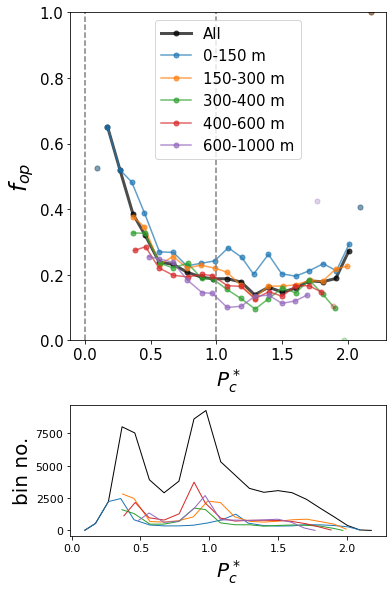

In [41]:
#---plot
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

    #all depths
analysis = uF.fop(all_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'black', linewidth = 3, label = 'All')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'black') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'black', linewidth = 1, label = 'All')

    #by depth group
for i,_depth in enumerate(depth_bins[:-1]):
    _name=name[i]
    color = plt.cm.tab10(i)

    # select depth group
    dataframe_a=all_data.loc[(-all_data['ELEVATION_ADJUSTEDSECUP'] <= depth_bins[i+1]) & (-all_data['ELEVATION_ADJUSTEDSECUP'] >=  depth_bins[i])].copy()
    
    analysis = uF.fop(dataframe_a,var,bin_number=bin_number, min=bin_min, max = bin_max)
    data_valid= analysis.loc[analysis['N']>=min_number]
    data_nvalid=analysis.loc[analysis['N']< min_number]
    ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, linewidth = 1.5, label = _name, color=color)
    ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = color) 
    ax2.plot(analysis[var], analysis['N'], linestyle = '-', linewidth = 1, label = _name, color = color)
    
# vertical lines (hydrostatic (0) and lithostatic (1) pressures)
ax.vlines(0, 0, 1, colors='gray', linestyles='--')
ax.vlines(1, 0, 1, colors='gray', linestyles='--')

#format graph
ax.set_xlabel(xlabel, fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel(xlabel, fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', var+'_by_depth')
fig.savefig(file_path)
fig.clf()

## 3) Analysis by differencing fracture domains and deformation zones

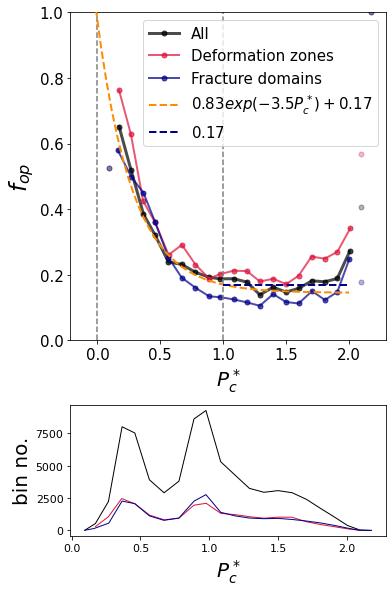

In [42]:
#---plot
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

    #all fractures
analysis = uF.fop(all_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'black', linewidth = 3, label = 'All')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'black') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'black', linewidth = 1, label = 'All')

    #Deformation Zones fractures
dz_data = all_data.loc[all_data['DEFORMATION_ZONE'].notnull()]
analysis = uF.fop(dz_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'crimson', linewidth = 2, label = 'Deformation zones')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'crimson') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'crimson', linewidth = 1, label = 'Deformation zones')

    #Fracture domains
ffm_data = all_data.loc[all_data['FRACTURE_DOMAIN'].isin(['FFM01', 'FFM02', 'FFM03', 'FFM04', 'FFM05', 'FFM06'])]
analysis = uF.fop(ffm_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'darkblue', linewidth = 2, label = 'Fracture domains')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'darkblue') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'darkblue', linewidth = 1, label = 'Fracture domains')
   
# fitting lines 
x = np.linspace(-0.1,2,50)
fop_min=0.17
B=3.5
ax.plot(x,(1-fop_min)*(np.exp(-B*x)-np.exp(-B))+fop_min, '--', linewidth = 2, color = 'darkorange', label = '${:g}exp(-{:g} P_c^*)+{:g}$'.format(1-fop_min,B,fop_min), zorder = 50)
ax.plot([1,2],[fop_min,fop_min],'--', linewidth = 2, color = 'darkblue', label = '${:g}$'.format(fop_min), zorder = 60)

# vertical lines (hydrostatic (0) and lithostatic (1) pressures)
ax.vlines(0, 0, 1, colors='gray', linestyles='--')
ax.vlines(1, 0, 1, colors='gray', linestyles='--')

#format graph
ax.set_xlabel(xlabel, fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel(xlabel, fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', var+'_by_ffm_dz')
fig.savefig(file_path)
fig.clf()